# Machine Learning Simulation Coursework - kNN
Maximilian Zebhauser

### Tasks: 

Coinsider a binary classification problem in which X takes values in 
$R^d$ and $Y \in {0, 1}$. The joint distribution is such that X is uniformly 
distributed in $ [0, 1]^d $ and $P\{Y = 1|X = x\} = x(1)$ 
(where x(1) is the first component of x = (x(1), . . . , x(d)).

Compute $R^{*}$,$R_{1-N N}$, and $R_{3-N N}$ (i.e., the Bayes risk and the asymptotic risk of the 1-, 
and 3-nearest neighbor rules). How do these quantities depend on the dimension d?

Write a program that generates training data of n i.i.d. pairs 
$ D_{n}=\left\{\left(X_{1}, Y_{1}\right), \ldots,\left(X_{n}, Y_{n}\right)\right\} $
of random variables distributed as described above.

Classify X using the 1, 3, 5, 7, 9-nearest neighbor rules. Re-draw (X, Y ) many times 
so that you can estimate the risk of these rules. Try this for various values of n and 
d and plot the estimated risk. Explain what you observe.

Now consider the classification rule that uses an additional set of m independent data 
$ D_{m}^{\prime}= \left\{\left(X_{1}^{\prime}, Y_{1}^{\prime}\right), \ldots,\left(X_{m}^{\prime}, 
Y_{m}^{\prime}\right)\right\} $ drawn from the same distribution to select 
the value of $k \in \{1, 3, 5, 7, 9\}$ in the k-nearest neighbor rule (trained on the data $D_n$) 
using empirical risk minimization based on $ D_{m}^{\prime}$ . Estimate the probability of error of 
this rule (using independent test data) and compare it to the probability of error of the 
best of these five classification rules. How large does m have to be to make sure that the 
data/based selection is close to optimal?
### Theoretical Background: 
The nearest neighbor classification rule in a metric space $\mathcal{X}$ is: 
$ g_n(x) =Y_{(1)}(x)$. Meaning the label of the with a specific distance measured 
$d(x,X_i)$ nearest point. For any distribution of $(X,Y)$, the asymptotic probability 
of error fo the nearest neighbor rule satisfies:
$$ R^{*} \leq R_{NN} = \lim_{n \rightarrow \infty} \mathbb{E}[R(g_n)] = 2 \mathbb{E} [ \eta(X)(1-\eta(X))] \leq 2 R^{*} (1-R^{*}) $$
This implies that the NN-rule is consistent whenever the classes are separated, e.g. $R^{*}=0$. Additionally, the convergence of the NN-rule is correlated with the dimensions (negative) and the sample size (positive). The \textbf{curse of dimensonality} says, that it gets harder to find a close point if $\eta$ changes quickly around the decision boundary (0.5). This is shown on a general example of local averaging. \\
For any odd k greater than one, the classification is a majority vote of the closest k points: 
$$ g_{n}(x)=\left\{\begin{array}{ll} {0} & {\text{ if } \sum_{i=0}^{k} Y_{(i)} < \frac{k}{2}}\\ {1} & {\text{otherwise}}\end{array}\right. $$
For the risk it is possible to derive the following bound: 
$$ R_{k-NN} \leq R^{*}+\frac{1}{\sqrt{e K}}$$
We also have that $R_{k-NN} \rightarrow R^*$ as $k  \rightarrow \infty$ and as 
$n \rightarrow \infty$. Large k means we are taking the majority decision among many votes, 
making the decision more stable (low variance), but we take into account more far away neighbors 
(high bias).
### Answer: 
CDF and PMF for $X \sim U(0,1)$:
$$ \mathbf{P}\{X \leq x\}=\left\{\begin{array}{ll}{0} & {\text { for } x<0} \\ {x} & {\text { for } x \in[0,1)} \\ {1} & {\text { for } x \geq 1}\end{array}\right. \quad \text{ and } \quad \mathbf{P}\{X=x\}=\left\{\begin{array}{ll}{1} & {\text { for } x \in[0,1]} \\ {0} & {\text { otherwise }}\end{array}\right. $$

The following is true for the variable  $ Y \sim B\left(1, x^{(1)}\right) $: 

$$ \eta(x)=\mathbf{P}\{Y=1 | X=x\}=x^{(1)} \Longrightarrow g^{*}(x)=\left\{\begin{array}{ll}{1} & {\text { for } x^{(1)}>\frac{1}{2}} \\ {0} & {\text { otherwise }}\end{array}\right. $$

From this we derive the Bayes risk: 

$$ \begin{aligned} R^{*}=R\left(g^{*}\right) &=\mathbb{E}[l(Y, g)) ]=P(Y=1) \mathbb{I}_{g=0}+P(Y=0) \mathbb{I}_{g=1} \\ &=\int_{0}^{\frac{1}{2}} \eta(x) d x+\int_{\frac{1}{2}}^{1}(1-\eta(x)) d x=\int_{0}^{\frac{1}{2}} x d x+\int_{\frac{1}{2}}^{1}(1-x) d x \\ &=\left[\frac{1}{2} x^{2}\right]_{0}^{\frac{1}{2}}+\left[x-\frac{1}{2} x^{2}\right]_{\frac{1}{2}}^{1}=\frac{1}{8}+\frac{1}{8}=\frac{1}{4}=0.25 \end{aligned} $$

The measure $R^{*}$ does not depend on the number of dimensions. Then we can calculate the $R_{1-N N}$:
$$ \begin{aligned} R_{1-N N} &=2 \mathbb{E}[\eta(x)(1-\eta(x))]=2 \mathbb{E}[x \cdot(1-x)] \\ &=2 \int_{0}^{1}\left(x-x^{2}\right) \cdot f(x) d x=2 \int_{0}^{1} 1 \cdot\left(x-x^{2}\right) d x \\ &=2 \int_{0}^{1}\left(x-x^{2}\right) d x \\ &=2\left[\frac{1}{2} x^{2}-\frac{1}{3} x^{3}\right]_{0}^{1}=1-\frac{2}{3}=\frac{1}{3} \approx 0.33 \leq 2 R^{*}\left(1-R^{*}\right)=0.375 \end{aligned} $$

The measure $R_{1-N N}$ suffers from the curse of dimensionality because the distance of points increases exponentially with the dimensions, which implies that in order to have the nearest neighbor close we need a huge amount of points. The measure is only consistent in higher dimensions if the classes are well separated. Then we can calculate the $R_{3-N N}$:
$$ \begin{aligned} R_{3-N N} &=\mathbb{E}[\eta(x)(1-\eta(x))]+4 \mathbb{E}\left[\eta(x)^{2}(1-\eta(x))^{2}\right] \\ &=\int_{0}^{1}\left(x-x^{2}\right) d x+4 \int_{0}^{1} x^{2}-2 x^{3}+x^{4} d x \\ &=\frac{1}{6}+4\left[\frac{1}{3} x^{3}-\frac{2}{4} x^{4}+\frac{1}{5} x^{5}\right]_{0}^{1} \\ &=\frac{1}{6}+\frac{4}{3}-\frac{8}{4}+\frac{5}{5}=\frac{5+40+24}{30}-2=\frac{23}{10}-\frac{20}{10}=\frac{3}{10}=0.3 \leq R_{1-N N} \approx 0.33 \end{aligned} $$

The measure $R_{3-N N}$ suffers from the curse of dimensionality because the space gets sparser if more dimensions are added. 
To counteract one has to add an exponential number of datapoints to guarantee that the neighbors are sufficiently close/ similar. 
Therefore, local averaging in high dimensions does not work properly.
For all simulations I average over 500 random datasets. The simulations proof the assumptions and calculations stated above. 
With a higher number of dimensions more datapoints are needed to converge to the
analytically derived risks. The analysis also clearly shows that a higher number of neighbors (k) to locally
average over minimizes the risk, which is no surprise as $R_{k-N N} \stackrel{k \rightarrow \infty}{\longrightarrow} R^{*}$. 

Empirics show that we could assume the 9-NN model as quasi-optimal as it outperforms the others. So we will use it as benchmark 
against the best of $k \in \{1, 3, 5, 7, 9\}$ to see dependent on $D_m$ if and when the risks do converge. While fixing the number 
of observations and dimensions, we can clearly see that with larger $D_m$ the two series converge. It is also possible to 
analytically derive the bounding size of $D_m$ for a given $\epsilon$ and $\delta$ with the formula we have seen in class, but let’s focus 
on the empirics in this analysis. From the data and the chosen parameters we can assume that the data based selection rule 
is close to optimal for m lager than 5000. The second plot shows which rule has been chosen proportionally dependent on $D_m$. 
We can see that a higher $D_m$ makes a choice of the optimal classifier more likely.
### Supporting Code & Plots:

In [1]:
# Import packages
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
# Define parameters to loop over
M = [50,100,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3250,3500,3750,4000,4250,4500,4750,5000]
nh = [1,3,5,7,9]

# Prepare empty results matrix
results = pd.DataFrame(np.zeros(shape= (len(M) * 500,4)),columns=['M','random_model','random_risk','optimal_risk'])



for m in range(0,len(M)):    
    # Create datasets and do calculations
    for l in range(0,500):
        X = pd.DataFrame(np.random.uniform(0,1,size=(250, 2)))
        Y = np.random.binomial(1, X[0])
        X_m = pd.DataFrame(np.random.uniform(0,1,size=(M[m], 2)))
        Y_m = np.random.binomial(1, X_m[0])
        # Fit kNN rule and safe the risk
        risk = []
        for i in range(0,len(nh)):
            model = KNeighborsClassifier(n_neighbors=nh[i])
            model.fit(X,Y)
            risk.append((1 - np.array(model.predict(X_m) == Y_m).mean()))
        # Create new dataset
        X = pd.DataFrame(np.random.uniform(0,1,size=(250, 2)))
        Y = np.random.binomial(1, X[0])
        X_m = pd.DataFrame(np.random.uniform(0,1,size=(M[m], 2)))
        Y_m = np.random.binomial(1, X_m[0])
        # Measure performance of the optimal model
        model_opt = KNeighborsClassifier(n_neighbors=9)
        model_opt.fit(X,Y)
        # Measure performance of the random best model
        model_ran = KNeighborsClassifier(n_neighbors=nh[risk.index(min(risk))])
        model_ran.fit(X,Y)
        # Store result
        results.iloc[(500 * m + l),0] = M[m]
        results.iloc[(500 * m + l),1] = str(nh[risk.index(min(risk))]) + "-NN"
        results.iloc[(500 * m + l),2] = 1 - np.array(model_ran.predict(X_m) == Y_m).mean()
        results.iloc[(500 * m + l),3] = 1 - np.array(model_opt.predict(X_m) == Y_m).mean()

In [5]:
# Claculate the ratios for each kNN
ratios = pd.DataFrame(np.zeros(shape= (len(M),6)),columns=['M','share_9','share_7','share_5',"share_3","share_1"])
for m in range(0,len(M)):
    X = list(results.iloc[(m*500):(m*500 +500),:]["random_model"])
    ratios.iloc[m,0] = M[m]
    ratios.iloc[m,1] = X.count("9-NN")/500
    ratios.iloc[m,2] = X.count("7-NN")/500
    ratios.iloc[m,3] = X.count("5-NN")/500
    ratios.iloc[m,4] = X.count("3-NN")/500
    ratios.iloc[m,5] = X.count("1-NN")/500

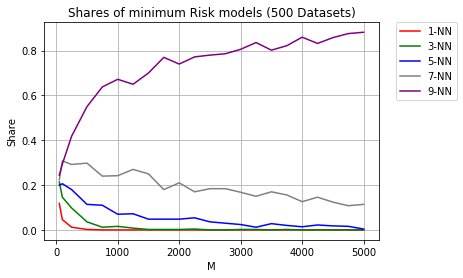

In [6]:
plt.plot(ratios["M"], ratios["share_1"],"r", label="1-NN")
plt.plot(ratios["M"], ratios["share_3"],"g", label="3-NN")
plt.plot(ratios["M"], ratios["share_5"],"b", label="5-NN")
plt.plot(ratios["M"], ratios["share_7"],"grey", label="7-NN")
plt.plot(ratios["M"], ratios["share_9"],"purple", label="9-NN")
plt.ylabel('Share')
plt.xlabel('M')
plt.title('Shares of minimum Risk models (500 Datasets)')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()